In [18]:
from pyenzyme.enzymeml.tools import EnzymeMLReader
import seaborn as sns

In [2]:
# Der EnzymeMLReader liest das Dokument für die aus und
# speichert alle Informationen in einem objekt-basierten 
# System. Du kannst von hier aus alles abrufen
enzmldoc = EnzymeMLReader().readFromFile('pyenzyme/Resources/Examples/ThinLayers/COPASI/3IZNOK_TEST/3IZNOK_TEST.omex')

# Die Print Funktion gibt dir eine Übersicht über das Dokument
print(enzmldoc)

>>> Units
	ID: u0 	 Name: l
	ID: u1 	 Name: uM
	ID: u2 	 Name: mM
	ID: u3 	 Name: K
	ID: u4 	 Name:  / s
	ID: u5 	 Name: mmole / l
>>> Reactants
	ID: s0 	 Name: indole
	ID: s1 	 Name: O-phospho-L-serine
	ID: s2 	 Name: L-Tryptophan
	ID: s3 	 Name: HPO4(2-)
>>> Proteins
	ID: p0 	 Name: TrpB2o from Arabidopsis thaliana 10.0 microM
>>> Reactions
	ID: r0 	 Name: steady-state kinetics with TrpB2o from Arabidopsis thaliana PConc: 10.00 uM


In [24]:
for id_, reac in enzmldoc.getReactionDict().items():
    
    # reac: Reaction Objekt
    # id_: IDentifier
    
    reaction_name = reac.getName()
    
    #### Educts ####
    for reactant_id, stoich, _, replicates, init_conc in reac.getEducts():
        
        # Aus dem Edukt folgt Tuple: 
        # Reactant ID, Stöchio, Constant, Replikate, Initial-Konzentrationen
        
        if len(replicates) > 0:
            
            df = reac.exportReplicates(reactant_id)
            time_val = df.index.tolist()
            time_unit = df.index.name.split('/')[1]

            # Tolle visualisierung
            for col in df.columns:
                
                name = enzmldoc.getReactant(col.split('/')[1]).getName()
                unit = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
                unit = enzmldoc.getUnitDict()[unit].getName()
                
                #sns.lineplot( x=time, y=df[col] )
                
            fname = f"{id_}_{name}_Educt.pdf"

r0_O-phospho-L-serine_Educt.pdf


In [3]:
# Hier kannst du das Reaktionsobjekt aus dem Dokument extrahieren
# Wie du siehst reicht es die Methode getReaction des Dokument-Objekts
# anzusprechen --> Objekt wird dann in Variable gespeichert
reac= enzmldoc.getReaction("r0")

In [27]:
# Mithilfe von exportReplicates werden dir alle Zeitverlaufsdaten für 
# den Reaktanten s1 (O-phospho-L-serine) als ein DataFrame exportiert
# Hier kannst du mit der Visualisierung beginnen
df_s0 = reac.exportReplicates('s0')
df_s1 = reac.exportReplicates('s1')
df_s2 = reac.exportReplicates('s2')
df_s3 = reac.exportReplicates('s3')
print(df_s1)
print(df_s1.iloc[:,])

# Spiele ein wenig mit den Visualisierungen herum und 
# finde einen Weg alle Replikate sinnvoll darzustellen
# Dieser Datensatz besitzt Zeitverlaufsdaten auch
# nur für ein Substrat

        repl_0/s1/conc  repl_1/s1/conc  repl_2/s1/conc  repl_3/s1/conc
time/s                                                                
0.0                0.0        0.166525        0.333188        0.499853
1.0                0.0        0.166384        0.333042        0.499706
2.0                0.0        0.166242        0.332896        0.499559
3.0                0.0        0.166101        0.332751        0.499412
4.0                0.0        0.165959        0.332605        0.499265
...                ...             ...             ...             ...
195.0              0.0        0.139076        0.304827        0.471193
196.0              0.0        0.138936        0.304682        0.471046
197.0              0.0        0.138796        0.304537        0.470900
198.0              0.0        0.138656        0.304391        0.470753
199.0              0.0        0.138516        0.304246        0.470606

[200 rows x 4 columns]
        repl_0/s1/conc  repl_1/s1/conc  repl_2/s1/con

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set_theme(style="whitegrid")
#Visualisierung funktioniert, wenn nur data = df eingegeben wird; sobald x und y definiert werden sollen funktioniert der Graph nicht mehr da
#x='time/s' nicht erkannt wird
#Visualisierung erfolgt hierbei nur von einem Substrat -> zeitlicher Verlauf der Triplikate eines Substrats
#Unterschied relplot und lineplot?

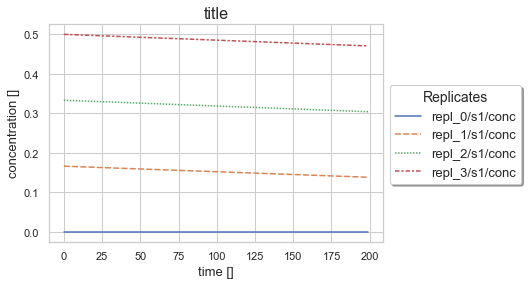

In [16]:
ax = sns.lineplot(data = df_s1)#x=df_s1.iloc[:,0],y=df_s1.iloc[:,3], data = df_s1)
#nachfolgende Zeile füht eine Überschrift ein 
#smit fontsize wird die chriftgröße des titels bestimmt
ax.set_title('title', fontsize = 16)
#legende aus dem graphen bekommen mit bbox_to_anchor; erste zahl verschiebt die Legende in x-Achsen richtung zweite Zahl in y-Achsen richtung
#Titel der Legende anpassen mit title = ''
#fontsize entspricht einstelungen der Schriftgröße auch in der Legende
ax.legend(fontsize = 13, \
               bbox_to_anchor= (1, 0.75), \
               title="Replicates", \
               title_fontsize = 14, \
               shadow = True, \
               facecolor = 'white');
#x und y-Achsenbeschriftung
ax.set_xlabel('time []', fontsize=13)
ax.set_ylabel('concentration []', fontsize=13)
#Graph als png speichern
#Speicherung erfolgt prinzipiell gleich wichtig nur was nach dem . steht und in dem Format wird es dann gespeichert
#allerdings wird hierbei die Legende abgeschnitten :o
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('save_as_a_png.png',bbox_inches = 'tight')
#Graph als pdf speichern, hier wird auch die Legende abgeschnitte was denn da los
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('saving-a-seaborn-plot-as-pdf-file_1.pdf',bbox_inches = 'tight')
#fügt man dpi=300 hat meine eine höhere Auflösung
plt.savefig('save_as_a_png_2.png',dpi=300,bbox_inches = 'tight')
plt.savefig('saving-a-seaborn-plot-as-pdf-file_2.pdf',bbox_inches = 'tight')
#Joaaaa seh da jetzt keinen unterschied so 

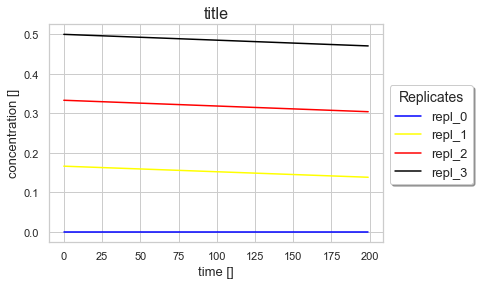

In [59]:
#entweder ich definiere x und y oder ich lasse es weg dann macht seabor das automatisch und ich spare mir code
# mit label wird in der Legende die entsprechende Kurve beschfriftet
#color färbt die entsprechende Kurve der festgelegten k´Farbe
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,0], data = df_s1,label='repl_0', color='blue')
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,1], data = df_s1,label='repl_1',color='yellow')
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,2], data = df_s1,label='repl_2',color='red')
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,3], data = df_s1,label='repl_3',color='black')
ax.set_title('title', fontsize = 16)
#legende aus dem graphen bekommen mit bbox_to_anchor; erste zahl verschiebt die Legende in x-Achsen richtung zweite Zahl in y-Achsen richtung
#Titel der Legende anpassen mit title = ''
#fontsize entspricht einstelungen der Schriftgröße auch in der Legende
ax.legend(fontsize = 13, \
               bbox_to_anchor= (1, 0.75), \
               title="Replicates", \
               title_fontsize = 14, \
               shadow = True, \
               facecolor = 'white');
#x und y-Achsenbeschriftung
ax.set_xlabel('time []', fontsize=13)
ax.set_ylabel('concentration []', fontsize=13)
#Graph als png speichern
#Speicherung erfolgt prinzipiell gleich wichtig nur was nach dem . steht und in dem Format wird es dann gespeichert
#allerdings wird hierbei die Legende abgeschnitten :o
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('save_as_a_png.png',bbox_inches = 'tight')
#Graph als pdf speichern, hier wird auch die Legende abgeschnitte was denn da los
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('saving-a-seaborn-plot-as-pdf-file_1.pdf',bbox_inches = 'tight')
#fügt man dpi=300 hat meine eine höhere Auflösung
plt.savefig('save_as_a_png_2.png',dpi=300,bbox_inches = 'tight')
plt.savefig('saving-a-seaborn-plot-as-pdf-file_2.pdf',bbox_inches = 'tight')
#Joaaaa seh da jetzt keinen unterschied so 

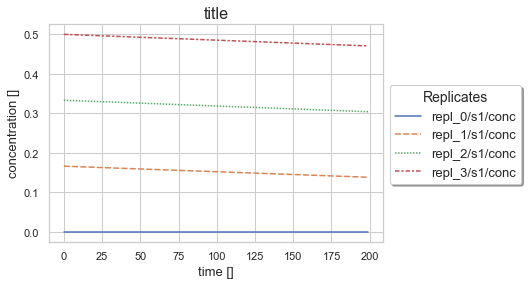

In [13]:
ax = sns.lineplot(data = df_s0)
ax = sns.lineplot(data = df_s1)
ax = sns.lineplot(data = df_s2)
ax = sns.lineplot(data = df_s3)
#nachfolgende Zeile füht eine Überschrift ein 
#smit fontsize wird die chriftgröße des titels bestimmt
ax.set_title('title', fontsize = 16)
#legende aus dem graphen bekommen mit bbox_to_anchor; erste zahl verschiebt die Legende in x-Achsen richtung zweite Zahl in y-Achsen richtung
#Titel der Legende anpassen mit title = ''
#fontsize entspricht einstelungen der Schriftgröße auch in der Legende
ax.legend(fontsize = 13, \
               bbox_to_anchor= (1, 0.75), \
               title="Replicates", \
               title_fontsize = 14, \
               shadow = True, \
               facecolor = 'white');
#x und y-Achsenbeschriftung
ax.set_xlabel('time []', fontsize=13)
ax.set_ylabel('concentration []', fontsize=13)
#Graph als png speichern
#Speicherung erfolgt prinzipiell gleich wichtig nur was nach dem . steht und in dem Format wird es dann gespeichert
#allerdings wird hierbei die Legende abgeschnitten :o
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('save_as_a_png.png',bbox_inches = 'tight')
#Graph als pdf speichern, hier wird auch die Legende abgeschnitte was denn da los
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('saving-a-seaborn-plot-as-pdf-file_1.pdf',bbox_inches = 'tight')
#fügt man dpi=300 hat meine eine höhere Auflösung
plt.savefig('save_as_a_png_2.png',dpi=300,bbox_inches = 'tight')
plt.savefig('saving-a-seaborn-plot-as-pdf-file_2.pdf',bbox_inches = 'tight')
#Joaaaa seh da jetzt keinen unterschied so 

In [12]:
# einen graphen für alle Reaktanten; bisschen viel Code so :o
# Farben für die Graphen findet man dort-> https://python-graph-gallery.com/100-calling-a-color-with-seaborn/
#df_s0
ax = sns.lineplot(x=df_s0.index, y=df_s0.iloc[:,0], data = df_s0,label='repl_0/s0',color='blue')
ax = sns.lineplot(x=df_s0.index, y=df_s0.iloc[:,1], data = df_s0,label='repl_1/s0',color='yellow')
ax = sns.lineplot(x=df_s0.index, y=df_s0.iloc[:,2], data = df_s0,label='repl_2/s0',color='red')
ax = sns.lineplot(x=df_s0.index, y=df_s0.iloc[:,3], data = df_s0,label='repl_3/s0',color='black')
#df_s1
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,0], data = df_s1,label='repl_0/s1',color='blue')
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,1], data = df_s1,label='repl_1/s1',color='yellow')
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,2], data = df_s1,label='repl_2/s1',color='red')
ax = sns.lineplot(x=df_s1.index, y=df_s1.iloc[:,3], data = df_s1,label='repl_3/s1',color='black')
#df_s2
ax = sns.lineplot(x=df_s2.index, y=df_s2.iloc[:,0], data = df_s2,label='repl_0/s2',color='blue')
ax = sns.lineplot(x=df_s2.index, y=df_s2.iloc[:,1], data = df_s2,label='repl_1/s2',color='yellow')
ax = sns.lineplot(x=df_s2.index, y=df_s2.iloc[:,2], data = df_s2,label='repl_2/s2',color='red')
ax = sns.lineplot(x=df_s2.index, y=df_s2.iloc[:,3], data = df_s2,label='repl_3/s2',color='black')
#df_s3
ax = sns.lineplot(x=df_s3.index, y=df_s3.iloc[:,0], data = df_s3,label='repl_0/s3',color='blue')
ax = sns.lineplot(x=df_s3.index, y=df_s3.iloc[:,1], data = df_s3,label='repl_1/s3',color='yellow')
ax = sns.lineplot(x=df_s3.index, y=df_s3.iloc[:,2], data = df_s3,label='repl_2/s3',color='red')
ax = sns.lineplot(x=df_s3.index, y=df_s3.iloc[:,3], data = df_s3,label='repl_3/s3',color='black')

ax.set_title('title', fontsize = 16)
#legende aus dem graphen bekommen mit bbox_to_anchor; erste zahl verschiebt die Legende in x-Achsen richtung zweite Zahl in y-Achsen richtung
#Titel der Legende anpassen mit title = ''
#fontsize entspricht einstelungen der Schriftgröße auch in der Legende
ax.legend(fontsize = 13, \
               bbox_to_anchor= (1, 0.75), \
               title="Replicates", \
               title_fontsize = 14, \
               shadow = True, \
               facecolor = 'white');
#x und y-Achsenbeschriftung
ax.set_xlabel('time []', fontsize=13)
ax.set_ylabel('concentration []', fontsize=13)
#Graph als png speichern
#Speicherung erfolgt prinzipiell gleich wichtig nur was nach dem . steht und in dem Format wird es dann gespeichert
#allerdings wird hierbei die Legende abgeschnitten :o
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('save_as_a_png.png',bbox_inches = 'tight')
#Graph als pdf speichern, hier wird auch die Legende abgeschnitte was denn da los
#habs gelöst mit bbox_inches = 'tight' dann wird auch die Legende mit gespeichert
plt.savefig('saving-a-seaborn-plot-as-pdf-file_1.pdf',bbox_inches = 'tight')
#fügt man dpi=300 hat meine eine höhere Auflösung
plt.savefig('save_as_a_png_2.png',dpi=300,bbox_inches = 'tight')
plt.savefig('saving-a-seaborn-plot-as-pdf-file_2.pdf',bbox_inches = 'tight')
#Joaaaa seh da jetzt keinen unterschied so 

IndexError: single positional indexer is out-of-bounds